### DATA PREPROCESS

In [2]:
import re
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error


In [3]:
# Load the data
train = pd.read_csv(r'C:\Users\Ahsan\Desktop\Data_mining_Project\train_0irEZ2H.csv')  # Replace 'your_data.csv' with the actual file path

# Display the first few rows of the dataset to get a sense of the data
train.head()


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
# Check for missing values
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [5]:
# Replacing null value with mean
train.fillna({'total_price':train['total_price'].mean()}, inplace=True)

In [6]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [7]:
# Convert 'week' to datetime format
train['week'] = pd.to_datetime(train['week'])

# Explore the data
train.describe()


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308172,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [8]:
train['week'] = pd.to_datetime(train['week']).dt.to_period("W")

In [9]:
# Extract features from the 'week' column
train['day_of_week'] = train['week'].dt.dayofweek
train['month'] = train['week'].dt.month
train['year'] = train['week'].dt.year


In [10]:
#Make sold units as group by weekly sales 
weekly_sales = train.groupby('week').sum().reset_index()
weekly_sales.head()

,week,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day_of_week,month,year
0,2011-01-03/2011-01-09,53820064,10625333,294249108,251624.3625,257291.5875,77,90,44134,6930,1155,2322705
1,2011-01-17/2011-01-23,943020,10625333,294249108,238189.4625,246524.2875,219,189,60029,6930,1155,2322705
2,2011-01-24/2011-01-30,2833455,10625333,294249108,237980.7000,248081.8125,317,226,56752,6930,1155,2322705
3,2011-01-31/2011-02-06,33978902,21250666,588498216,490708.7250,500878.2375,12,214,97544,13860,4620,4645410
4,2011-02-14/2011-02-20,8508601,10625333,294249108,219204.1875,249112.0875,122,241,109207,6930,2310,2322705


In [11]:
weekly_sales['week'] = weekly_sales['week'].dt.to_timestamp()

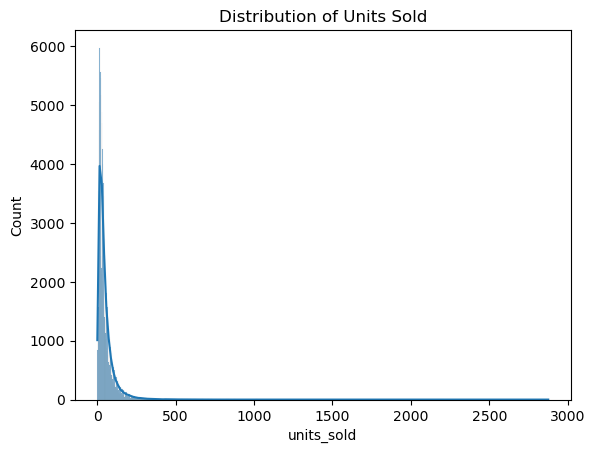

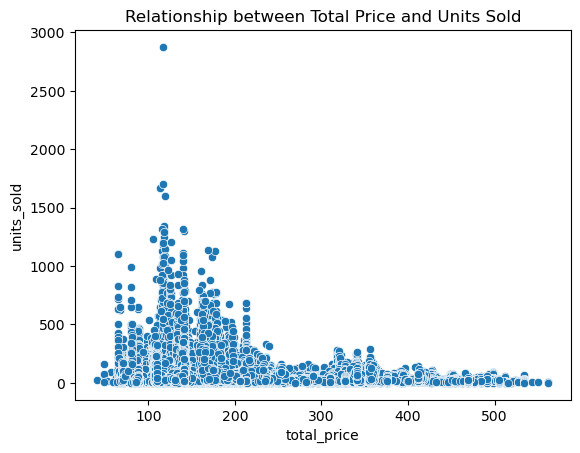

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
sns.histplot(train['units_sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.show()

# Explore relationships between features and the target variable
sns.scatterplot(x='total_price', y='units_sold', data=train)
plt.title('Relationship between Total Price and Units Sold')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = train.drop(['record_ID', 'week', 'units_sold'], axis=1)
y = train['units_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 14.388174499628096
Mean Squared Error: 767.3112810245836


In [15]:
print(y_pred_rf)

[ 40.24642857   6.64735714 398.635      ... 150.05816667  25.28333333
  33.935     ]


In [16]:
rf_msle = mean_squared_log_error(y_test, y_pred_rf)
print(f'RandomForest Mean Squared Log Error: {rf_msle}')

RandomForest Mean Squared Log Error: 0.18389457709011248


In [17]:
import lightgbm as lgb
# Initialize the model
lgb_model = lgb.LGBMRegressor()

# Train the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 120120, number of used features: 8
[LightGBM] [Info] Start training from score 51.789352


LGBMRegressor()

In [18]:
# Make predictions on the testing set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 16.858241508848465
Mean Squared Error: 766.4999696765516


In [19]:
print(y_pred_lgb)

[ 39.46054107  27.71566697 334.26636332 ...  96.74667995  17.82313617
  60.6755817 ]


In [20]:
lgb_msle = mean_squared_log_error(y_test, y_pred_lgb)
print(f'LGBModel Mean Squared Log Error: {lgb_msle}')

LGBModel Mean Squared Log Error: 0.27454551384047154


In [14]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the model
model_DTR = DecisionTreeRegressor(random_state=42)  # You can adjust parameters as needed

# Train the model
model_DTR.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the testing set
y_pred_DTR = model_DTR.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_DTR)
mse = mean_squared_error(y_test, y_pred_DTR)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 18.101656121656124
Mean Squared Error: 1337.5489031894033


In [17]:
print(y_pred_DTR)

[ 47.5   6.  492.  ... 142.   18.   23. ]


In [18]:
DTR_msle = mean_squared_log_error(y_test, y_pred_DTR)
print(f'DecisionTree Mean Squared Log Error: {DTR_msle}')

DecisionTree Mean Squared Log Error: 0.2847198947853756


In [ ]:
from sklearn.svm import SVR
# Initialize the model
model_SVR = SVR()

# Train the model
model_SVR.fit(X_train, y_train)


In [ ]:
# Make predictions on the testing set
y_pred_SVR = model_SVR.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_SVR)
mse = mean_squared_error(y_test, y_pred_SVR)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


In [ ]:
SVR_msle = mean_squared_log_error(y_test, y_pred_SVR)
print(f'DecisionTree Mean Squared Log Error: {SVR_msle}')

## PREDICTION

In [ ]:
# Load the next 12 weeks test data
next_12_weeks_data = pd.read_csv(r'C:\Users\Ahsan\Desktop\Data_mining_Project\test_nfaJ3J5.csv')  # Replace 'your_next_12_weeks_data.csv' with the actual file path

# Convert 'week' to datetime format and extract additional features
next_12_weeks_data['week'] = pd.to_datetime(next_12_weeks_data['week'])
next_12_weeks_data['day_of_week'] = next_12_weeks_data['week'].dt.dayofweek
next_12_weeks_data['month'] = next_12_weeks_data['week'].dt.month
next_12_weeks_data['year'] = next_12_weeks_data['week'].dt.year

# Make predictions for the next 12 weeks
next_12_weeks_data['predicted_units_sold'] = model.predict(next_12_weeks_data.drop(['record_ID', 'week'], axis=1))

# Display the predictions
print(next_12_weeks_data[['week', 'store_id', 'sku_id', 'predicted_units_sold']])


In [ ]:
next_12_weeks_data.head()